In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler

In [ ]:
R-R 

# max R = 1 
# cycle을 뽑아내서 

In [ ]:
resampling 
reference frame -> median 
cosine similarity: 가장 작은 데이터 보기

In [3]:
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arr'
os.chdir(PATH_IN)
rpeakList = [i for i in os.listdir(PATH_IN) if i.startswith('correct')]
fxvalList = [i for i in os.listdir(PATH_IN) if i.startswith('filtered')]

In [4]:
rpeaks = pd.read_csv(rpeakList[0], header=None)

In [5]:
fxvalList = pd.read_csv(fxvalList[0], header=None)

In [6]:
# min-max normalization 
min_max_scaler = MinMaxScaler()

In [7]:
# fxvals = fxvalList[0]
# rpeaks = 1 
fxvals = fxvalList

In [8]:
# minmax normalization for fxvals(ECG Voltage)
fxvals_MinMax = min_max_scaler.fit_transform(fxvals)

In [21]:
fxvals_MinMax[370], fxvals_MinMax[662], fxvals_MinMax[947]


(array([0.78493163]), array([0.78982738]), array([0.77506309]))

(0    1.088302
 dtype: float64,
 0   -0.312092
 dtype: float64)

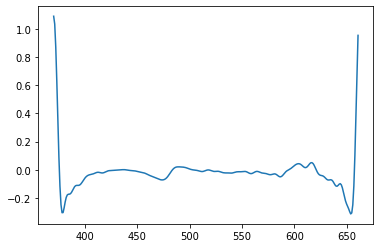

In [9]:
plt.plot(fxvals[370:662])

np.max(fxvals[370:662]), np.min(fxvals[370:662])

(0.7849316273137059, 0.36691101761915085)

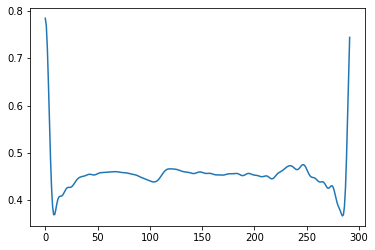

In [10]:
plt.plot(fxvals_MinMax[370:662])

np.max(fxvals_MinMax[370:662]), np.min(fxvals_MinMax[370:662])

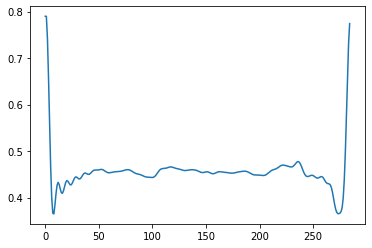

In [11]:
plt.plot(fxvals_MinMax[662:947])

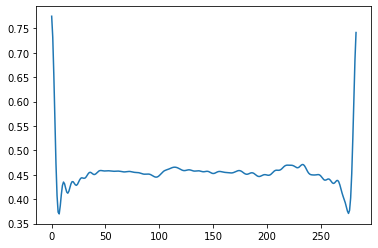

In [12]:
plt.plot(fxvals_MinMax[947:1231])

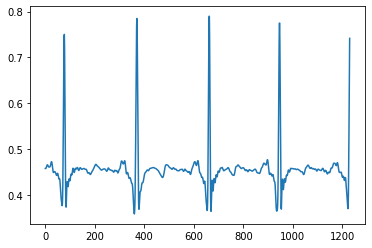

In [13]:
plt.plot(fxvals_MinMax[:1231])

In [ ]:
# reference r-r interval 

# rpeak = 1 
# 1) abnormal/ normal -> median (overall mean)
# 1-1) t-wave; r-peak 보다 큰 경우
# 2) qrs width 
# p-qrs-t wave annotation 
# normalization 1) amplitudue, time(cycle)



In [34]:
rpeaks[0]

0           77.0
1          370.0
2          662.0
3          947.0
4         1231.0
          ...   
2267    648733.0
2268    648978.0
2269    649232.0
2270    649484.0
2271    649733.0
Name: 0, Length: 2272, dtype: float64

In [39]:
rpeaks.iloc[1]

0    370.0
Name: 1, dtype: float64

In [44]:
rr_interval = rpeaks.iloc[4] - rpeaks.iloc[3]

In [47]:
rpeaks.iloc[4] - rpeaks.iloc[3], rpeaks.iloc[6] - rpeaks.iloc[5]

(0    284.0
 dtype: float64,
 0    294.0
 dtype: float64)

In [49]:
rr_intervals = []
for i in range(len(rpeaks)):
    if i + 1 == len(rpeaks):
        break
    else:
        rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
        rr_intervals.append(int(rr_interval))

(array([1.000e+01, 1.800e+01, 3.100e+01, 3.790e+02, 1.452e+03, 3.510e+02,
        1.300e+01, 1.600e+01, 0.000e+00, 1.000e+00]),
 array([179. , 203.2, 227.4, 251.6, 275.8, 300. , 324.2, 348.4, 372.6,
        396.8, 421. ]),
 <BarContainer object of 10 artists>)

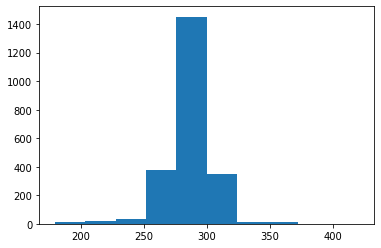

In [59]:
plt.hist(rr_intervals)# np.mean(rr_intervals), np.median(rr_intervals), np.max(rr_intervals)


In [65]:
pd.DataFrame(rr_intervals).describe()

,0
count,2271.000000
mean,286.066050
std,17.663149
min,179.000000
25%,278.000000
50%,287.000000
75%,296.000000
max,421.000000


In [67]:
np.median(rr_intervals)

287.0

In [ ]:
# 1:287
rr_ref = np.median(rr_intervals)

for i in rr_intervals:
    if i == np.median(rr_intervals):
        pass
    elif i != np.median(rr_intervals):
        i/np.median(rr_intervals)
        

In [70]:
rpeaks.iloc[50]

0    14710.0
Name: 50, dtype: float64

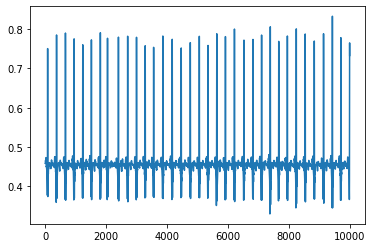

In [74]:
plt.plot(fxvals_MinMax[:10000])

In [14]:
#rr_intervals
#rpeaks.iloc[4]
#fxvals_MinMax[947:1231]

rr_intervals = []
y_vals = []
for i in range(len(rpeaks)):
    if i + 1 == len(rpeaks):
        break
    else:
        rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
        y_val = fxvals_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
        rr_intervals.append(int(rr_interval))
        y_vals.append(y_val)
        

In [15]:
len(y_vals), len(rr_intervals)

(2271, 2271)

In [20]:
# resampling

from scipy import signal
x =  list(range(rr_intervals[0]))
y = y_vals[0]
f = signal.resample(y, 286)

In [21]:
f = signal.resample(y_vals[0], 286)
len(f), len(y_vals[0])

(286, 293)

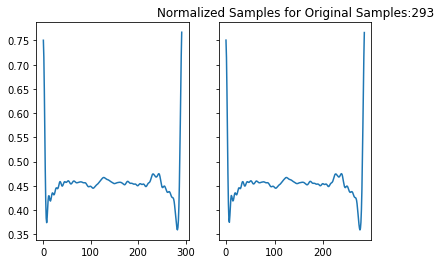

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.title('Normalized Samples for Original Samples:{}'.format(len(y_vals[0])))
ax1.plot(y_vals[0])
#ax1.('Samples:{}')#.format(rr_intervals[0]))
# ax1.grid()
ax2.plot(f)

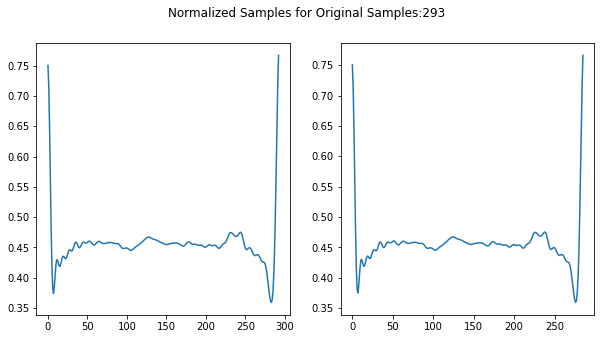

In [23]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.suptitle('Normalized Samples for Original Samples:{}'.format(len(y_vals[0])))

plt.subplot(121)
plt.plot(y_vals[0])
 
plt.subplot(122)
plt.plot(f)
plt.show()

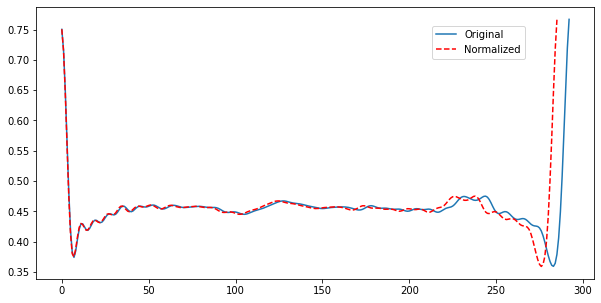

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(y_vals[0], label='Original')
plt.plot(f, 'r--', label='Normalized')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 0.95))

## resampling based on RR-intervals' mean 

In [30]:
# Split samples based on rr_intervals 
rr_intervals = []
y_vals = []
for i in range(len(rpeaks)):
    if i + 1 == len(rpeaks):
        break
    else:
        rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
        y_val = fxvals_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
        rr_intervals.append(int(rr_interval))
        y_vals.append(y_val)

# resampling
from scipy import signal
new_yvals = []
norm_sample= int(np.mean(rr_intervals))
for i in range(len(y_vals)):
    new_yval = signal.resample(y_vals[i], norm_sample)
    new_yvals.append(new_yval)

In [26]:
# label rr_invervals as rrid_1, rrid_2 .. rrid_n
rrids = ["rrid_" + str(i) for i in range(len(rr_intervals))]

In [27]:
# create a dictionary
rr_dict = dict(zip(rrids, new_yvals))

In [28]:
# get all the book ids in a list
ids = list(rr_dict.keys())

In [29]:
# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

In [31]:
print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 2577585 pairs
Displaying first 10 pairs: 


[('rrid_0', 'rrid_1'),
 ('rrid_0', 'rrid_2'),
 ('rrid_0', 'rrid_3'),
 ('rrid_0', 'rrid_4'),
 ('rrid_0', 'rrid_5'),
 ('rrid_0', 'rrid_6'),
 ('rrid_0', 'rrid_7'),
 ('rrid_0', 'rrid_8'),
 ('rrid_0', 'rrid_9'),
 ('rrid_0', 'rrid_10')]

....
Displaying last 10 pairs: 


[('rrid_2266', 'rrid_2267'),
 ('rrid_2266', 'rrid_2268'),
 ('rrid_2266', 'rrid_2269'),
 ('rrid_2266', 'rrid_2270'),
 ('rrid_2267', 'rrid_2268'),
 ('rrid_2267', 'rrid_2269'),
 ('rrid_2267', 'rrid_2270'),
 ('rrid_2268', 'rrid_2269'),
 ('rrid_2268', 'rrid_2270'),
 ('rrid_2269', 'rrid_2270')]

In [32]:
pairwise_cosine_similarity = [distance.cosine(rr_dict[pair[0]], rr_dict[pair[1]]) for pair in pairs]

In [33]:
len(pairwise_cosine_similarity)

2577585

### Make DataFrame for each pair and cosine similarity 

In [ ]:
pd.DataFrame({'base_rr': })

In [ ]:
# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        print(j)
        break
#         base_rr.append(ids[i])
#         base_rr.((ids[i+1:], j))

In [111]:
# create all possible pairs
base_rr = []
target_rr = []
pairs = []

# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        base_rr.append(ids[i])
        target_rr.append(j)
        pairs.append((ids[i], j))
#        (pairs = base_rr, target_rr)


In [112]:
len(base_rr), len(target_rr), len(pairs), len(pairwise_cosine_similarity)

(2577585, 2577585, 2577585, 2577585)

In [114]:
# create a dataframe
df = pd.DataFrame({'pair':pairs, 'base_rr': base_rr, 'target_rr': target_rr, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

,pair,base_rr,target_rr,similarity
0,"(rrid_0, rrid_1)",rrid_0,rrid_1,0.000593
1,"(rrid_0, rrid_2)",rrid_0,rrid_2,0.000388
2,"(rrid_0, rrid_3)",rrid_0,rrid_3,0.000171
3,"(rrid_0, rrid_4)",rrid_0,rrid_4,0.000099
4,"(rrid_0, rrid_5)",rrid_0,rrid_5,0.000116


,pair,base_rr,target_rr,similarity
2577580,"(rrid_2267, rrid_2269)",rrid_2267,rrid_2269,0.000109
2577581,"(rrid_2267, rrid_2270)",rrid_2267,rrid_2270,0.000225
2577582,"(rrid_2268, rrid_2269)",rrid_2268,rrid_2269,0.000113
2577583,"(rrid_2268, rrid_2270)",rrid_2268,rrid_2270,0.000396
2577584,"(rrid_2269, rrid_2270)",rrid_2269,rrid_2270,0.000360


In [115]:
final_similarity = [1-distance.cosine(rr_dict[pair[0]], rr_dict[pair[1]]) for pair in pairs]

In [116]:
df_update = pd.DataFrame({'pair':pairs, 'base_rr': base_rr, 'target_rr': target_rr, 'similarity': pairwise_cosine_similarity, '1-cosine_similarity': final_similarity})
display(df_update.head())
display(df_update.tail())

,pair,base_rr,target_rr,similarity,1-cosine_similarity
0,"(rrid_0, rrid_1)",rrid_0,rrid_1,0.000593,0.999407
1,"(rrid_0, rrid_2)",rrid_0,rrid_2,0.000388,0.999612
2,"(rrid_0, rrid_3)",rrid_0,rrid_3,0.000171,0.999829
3,"(rrid_0, rrid_4)",rrid_0,rrid_4,0.000099,0.999901
4,"(rrid_0, rrid_5)",rrid_0,rrid_5,0.000116,0.999884


,pair,base_rr,target_rr,similarity,1-cosine_similarity
2577580,"(rrid_2267, rrid_2269)",rrid_2267,rrid_2269,0.000109,0.999891
2577581,"(rrid_2267, rrid_2270)",rrid_2267,rrid_2270,0.000225,0.999775
2577582,"(rrid_2268, rrid_2269)",rrid_2268,rrid_2269,0.000113,0.999887
2577583,"(rrid_2268, rrid_2270)",rrid_2268,rrid_2270,0.000396,0.999604
2577584,"(rrid_2269, rrid_2270)",rrid_2269,rrid_2270,0.000360,0.999640


In [117]:
rr_pivot = pivot(df_update['target_rr'], df_update['base_rr'], df_update['similarity'])
ax = sns.heatmap(rr_pivot, annot=True, fmt="d")

NameError: name 'pivot' is not defined

In [123]:
essen = df_update.pop('pair')
essen = df_update.pop('similarity')

In [125]:
df_update

,base_rr,target_rr,1-cosine_similarity
0,rrid_0,rrid_1,0.999407
1,rrid_0,rrid_2,0.999612
2,rrid_0,rrid_3,0.999829
3,rrid_0,rrid_4,0.999901
4,rrid_0,rrid_5,0.999884
...,...,...,...
2577580,rrid_2267,rrid_2269,0.999891
2577581,rrid_2267,rrid_2270,0.999775
2577582,rrid_2268,rrid_2269,0.999887
2577583,rrid_2268,rrid_2270,0.999604


In [ ]:
rr_pivot = pivot(df_update['target_rr'], df_update['base_rr'], df_update['similarity'])
ax = sns.heatmap(rr_pivot, annot=True, fmt="d")

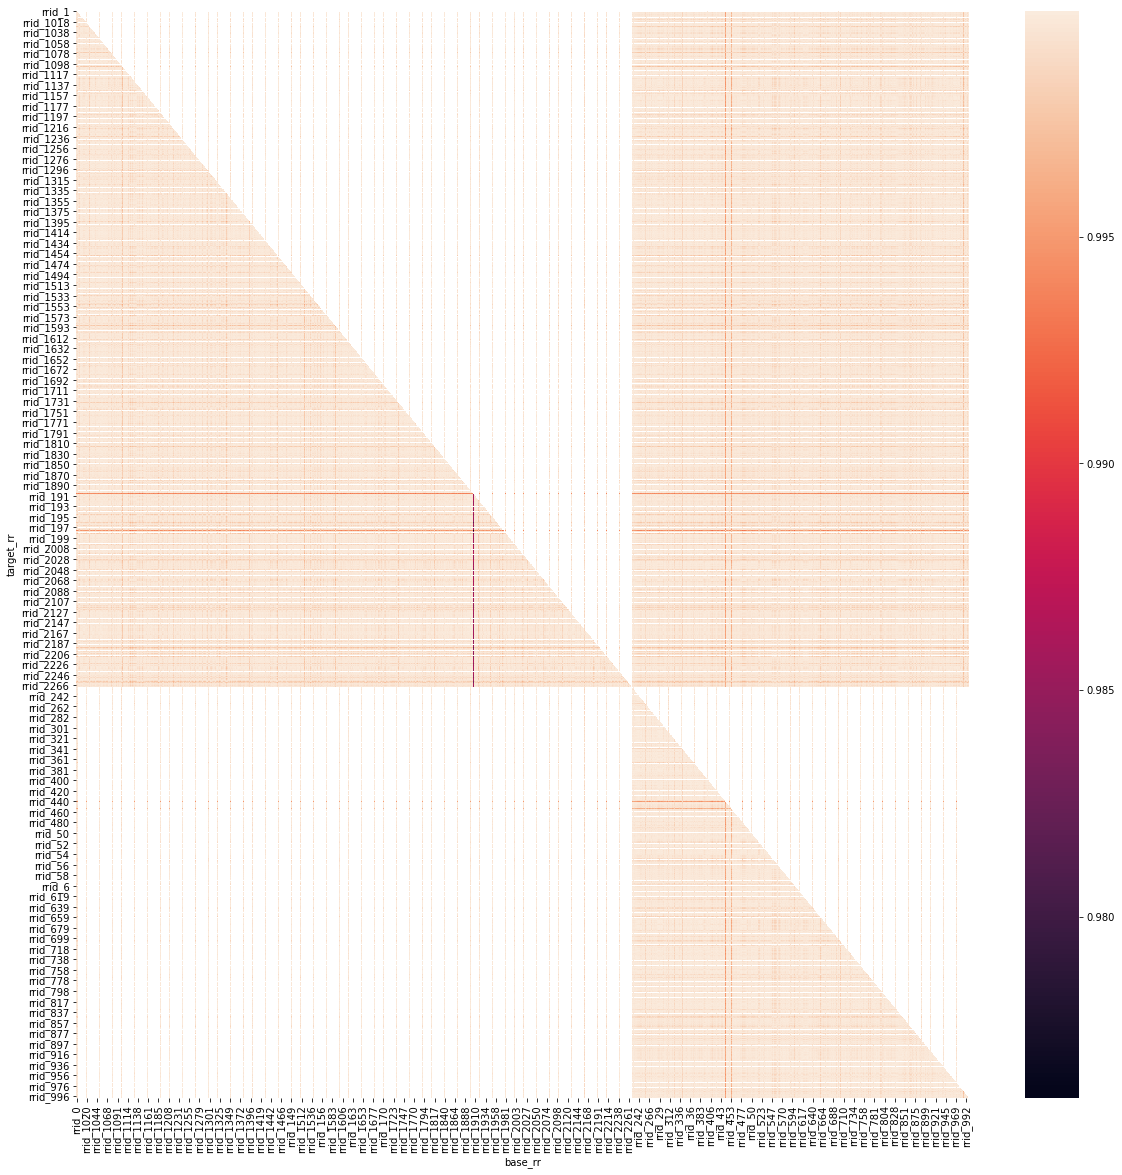

In [134]:
rr_pivot = df_update.pivot('target_rr', 'base_rr', '1-cosine_similarity')
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(rr_pivot)#, linewidths=.5)#, annot=True, fmt="d")

In [ ]:
ax = sns.heatmap()

In [136]:
df_update.pivot('target_rr', 'base_rr', '1-cosine_similarity')

base_rr,rrid_0,rrid_1,rrid_10,rrid_100,rrid_1000,rrid_1001,rrid_1002,rrid_1003,rrid_1004,rrid_1005,...,rrid_990,rrid_991,rrid_992,rrid_993,rrid_994,rrid_995,rrid_996,rrid_997,rrid_998,rrid_999
target_rr,,,,,,,,,,,,,,,,,,,,,
rrid_1,0.999407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_10,0.999472,0.999910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_100,0.999906,0.999365,0.999399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_1000,0.999703,0.999413,0.999383,0.999813,NaN,NaN,NaN,NaN,NaN,NaN,...,0.999613,0.999926,0.999945,0.999865,0.999909,0.999384,0.999848,0.999824,0.999767,0.999787
rrid_1001,0.999516,0.999038,0.999015,0.999738,0.999901,NaN,NaN,NaN,NaN,NaN,...,0.999297,0.999782,0.999890,0.999735,0.999833,0.999519,0.999749,0.999841,0.999571,0.999578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rrid_995,0.999328,0.998521,0.998567,0.999488,NaN,NaN,NaN,NaN,NaN,NaN,...,0.998760,0.999265,0.999235,0.999184,0.999455,NaN,NaN,NaN,NaN,NaN
rrid_996,0.999457,0.999634,0.999530,0.999636,NaN,NaN,NaN,NaN,NaN,NaN,...,0.999695,0.999884,0.999867,0.999756,0.999769,0.999110,NaN,NaN,NaN,NaN
rrid_997,0.999299,0.999252,0.999217,0.999557,NaN,NaN,NaN,NaN,NaN,NaN,...,0.999422,0.999800,0.999853,0.999667,0.999800,0.999276,0.999836,NaN,NaN,NaN


In [151]:
df_pivot = df_update.pivot('target_rr', 'base_rr', '1-cosine_similarity')

In [153]:
df_pivot.head()

base_rr,rrid_0,rrid_1,rrid_10,rrid_100,rrid_1000,rrid_1001,rrid_1002,rrid_1003,rrid_1004,rrid_1005,...,rrid_990,rrid_991,rrid_992,rrid_993,rrid_994,rrid_995,rrid_996,rrid_997,rrid_998,rrid_999
target_rr,,,,,,,,,,,,,,,,,,,,,
rrid_1,0.999407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_10,0.999472,0.999910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_100,0.999906,0.999365,0.999399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rrid_1000,0.999703,0.999413,0.999383,0.999813,NaN,NaN,NaN,NaN,NaN,NaN,...,0.999613,0.999926,0.999945,0.999865,0.999909,0.999384,0.999848,0.999824,0.999767,0.999787
rrid_1001,0.999516,0.999038,0.999015,0.999738,0.999901,NaN,NaN,NaN,NaN,NaN,...,0.999297,0.999782,0.999890,0.999735,0.999833,0.999519,0.999749,0.999841,0.999571,0.999578


In [147]:
col = df_update['base_rr']
idx = df_update['target_rr']

In [150]:
df_update['1-cosine_similarity']

0          0.999407
1          0.999612
2          0.999829
3          0.999901
4          0.999884
             ...   
2577580    0.999891
2577581    0.999775
2577582    0.999887
2577583    0.999604
2577584    0.999640
Name: 1-cosine_similarity, Length: 2577585, dtype: float64

TypeError: '<=' not supported between instances of 'str' and 'float'

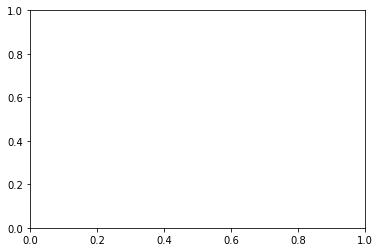

In [146]:
plt.pcolor(df_update)

In [135]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


['rrid_1',
 'rrid_2',
 'rrid_3',
 'rrid_4',
 'rrid_5',
 'rrid_6',
 'rrid_7',
 'rrid_8',
 'rrid_9',
 'rrid_10',
 'rrid_11',
 'rrid_12',
 'rrid_13',
 'rrid_14',
 'rrid_15',
 'rrid_16',
 'rrid_17',
 'rrid_18',
 'rrid_19',
 'rrid_20',
 'rrid_21',
 'rrid_22',
 'rrid_23',
 'rrid_24',
 'rrid_25',
 'rrid_26',
 'rrid_27',
 'rrid_28',
 'rrid_29',
 'rrid_30',
 'rrid_31',
 'rrid_32',
 'rrid_33',
 'rrid_34',
 'rrid_35',
 'rrid_36',
 'rrid_37',
 'rrid_38',
 'rrid_39',
 'rrid_40',
 'rrid_41',
 'rrid_42',
 'rrid_43',
 'rrid_44',
 'rrid_45',
 'rrid_46',
 'rrid_47',
 'rrid_48',
 'rrid_49',
 'rrid_50',
 'rrid_51',
 'rrid_52',
 'rrid_53',
 'rrid_54',
 'rrid_55',
 'rrid_56',
 'rrid_57',
 'rrid_58',
 'rrid_59',
 'rrid_60',
 'rrid_61',
 'rrid_62',
 'rrid_63',
 'rrid_64',
 'rrid_65',
 'rrid_66',
 'rrid_67',
 'rrid_68',
 'rrid_69',
 'rrid_70',
 'rrid_71',
 'rrid_72',
 'rrid_73',
 'rrid_74',
 'rrid_75',
 'rrid_76',
 'rrid_77',
 'rrid_78',
 'rrid_79',
 'rrid_80',
 'rrid_81',
 'rrid_82',
 'rrid_83',
 'rrid_84',
 

In [37]:
import utils 

In [49]:
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(2271), 'cols': range(2271), 'vals': pd.Series(np.zeros(2271))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['rr1'] = list1
df_temp['rr2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['rr1'] = df_temp['rr1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['rr2'] = df_temp['rr2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.rr1, df_temp.rr2, df_temp.similarity))

# display(df_temp.head())

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    #print(row,col,similarity)
    df_hm.iloc[col, row] = similarity




AttributeError: module 'utils' has no attribute 'plot_heatmap'

In [61]:
df_hm.iloc[0]

      cols
vals  0       0.0
      1       0.0
      2       0.0
      3       0.0
      4       0.0
             ... 
      2266    0.0
      2267    0.0
      2268    0.0
      2269    0.0
      2270    0.0
Name: 0, Length: 2271, dtype: float64

In [58]:
import seaborn as sns

df_hm_sns = sns.load_dataset(df_hm)
df_hm_sns_map = df_hm_sns.pivot('cols', 'ind', 'similarity')
ax = sns.heatmap(df_hm_sns_map)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [56]:
from utils import plot_heatmap
ax = utils.plot_heatmap(df_hm, ids, ids)


ImportError: cannot import name 'plot_heatmap' from 'utils' (C:\Users\MI2RL-KHJ\anaconda3\envs\ecg_env\lib\site-packages\utils\__init__.py)

In [ ]:
import seaborn as sns


In [42]:
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity 
    print(col, row, similarity)
    break

1 0 0.0


In [45]:
df_hm.iloc[2, 0] 

0.00038824279706517473

In [73]:
# Error
# # calculate cosine similarity

# similar_matrix = []
# for pair in pairs:
#     pairwise_cosine_similarity = distance.cosine(rr_dict[pair[0]], rr_dict[pair[1]])
#     similar_matrix.append(dict(zip(pair, pairwise_cosine_similarity)))

TypeError: 'numpy.float64' object is not iterable

In [25]:

# heatmap
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

#similarity = cosine_similarity(new_yvals)
#print(similarity.shape)

for i in range(len(new_yvals)):
    for j in range(len(new_yvals):
        similarity = distance.cosine(new_yvals[i], new_yvals[j])
    

2271

2577585

,pair,similarity
0,"(rrid_0, rrid_1)",0.000593
1,"(rrid_0, rrid_2)",0.000388
2,"(rrid_0, rrid_3)",0.000171
3,"(rrid_0, rrid_4)",0.000099
4,"(rrid_0, rrid_5)",0.000116


,pair,similarity
2577580,"(rrid_2267, rrid_2269)",0.000109
2577581,"(rrid_2267, rrid_2270)",0.000225
2577582,"(rrid_2268, rrid_2269)",0.000113
2577583,"(rrid_2268, rrid_2270)",0.000396
2577584,"(rrid_2269, rrid_2270)",0.000360


ImportError: cannot import name 'plot_heatmap' from 'utils' (C:\Users\MI2RL-KHJ\anaconda3\envs\ecg_env\lib\site-packages\utils\__init__.py)

In [81]:
df_temp = df.copy()
df_temp.pair

0                (rrid_0, rrid_1)
1                (rrid_0, rrid_2)
2                (rrid_0, rrid_3)
3                (rrid_0, rrid_4)
4                (rrid_0, rrid_5)
                    ...          
2577580    (rrid_2267, rrid_2269)
2577581    (rrid_2267, rrid_2270)
2577582    (rrid_2268, rrid_2269)
2577583    (rrid_2268, rrid_2270)
2577584    (rrid_2269, rrid_2270)
Name: pair, Length: 2577585, dtype: object

In [ ]:
## Plot a heatmap of cosine similarity values

from utils import plot_heatmap
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(24), 'cols': range(24), 'vals': pd.Series(np.zeros(24))})